# **Data Preprocessing**

In [27]:
import pandas as pd
import numpy as np


#Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Display the first few rows of the traning data
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# **Handle Missing Values**

In [28]:
# Fill missing values in "Age" with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

#Fill missing values in "Embarked" with the most common value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

#Fill missing values in "Fare" in the test set with the median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

#Drop "Cabin" column as it has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [16]:
# Check if there are my remaining missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **Convert categorical variables to numerical using one_hot encoding**

In [17]:
#Convert categorical variables to dummy variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

#Align the test data with the traning data
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

#Drop the "Survived" column from the test data
test_data.drop('Survived', axis=1, inplace=True)

# **Feature Engineering**
# Define the features and target variables for the model

In [18]:
# Define features and target variable
X = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = train_data['Survived']

# Define test features
X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

# **Exploratory Data Analysis (EDA)**

Understand the relationship between features and survival

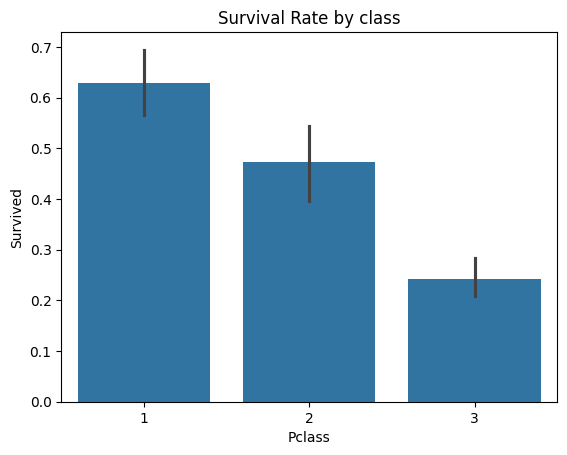

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize survival rate by class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by class')
plt.show()

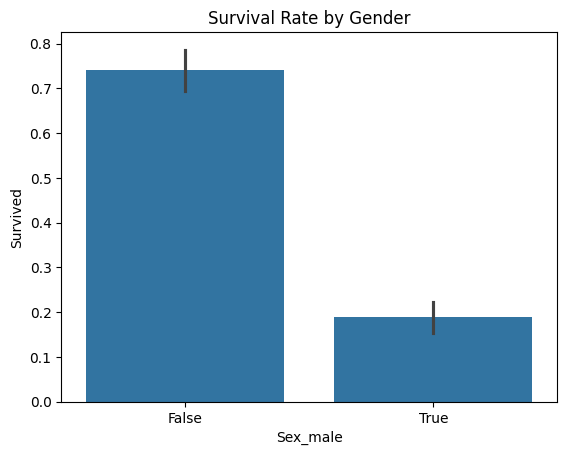

In [20]:
# Visulize survival rate by gender
sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

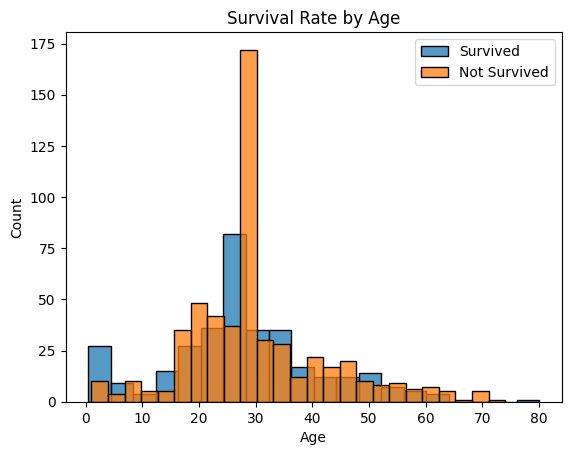

In [21]:
# Visualize survival rate by age
sns.histplot(train_data['Age'][train_data['Survived']==1], kde=False, label='Survived')
sns.histplot(train_data['Age'][train_data['Survived']==0], kde=False, label='Not Survived')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()

# **Model Traning and Evaluation**
Train multiple models and evaluate their performance

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    results[model_name] = [accuracy, precision, recall, f1]

# Display results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.804469   0.782609  0.729730  0.755245
Decision Tree        0.782123   0.727273  0.756757  0.741722
Random Forest        0.821229   0.791667  0.770270  0.780822
Gradient Boosting    0.821229   0.828125  0.716216  0.768116


# **Making Predictions**
Use the best model to make predictions on the test set.

In [24]:
# Choose the best model based on accuracy
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]

# Make predictions on the test set
test_data['Survived'] = best_model.predict(X_test)

# **Creating a Submission File**
Create a submission file in the required format for Kaggle.

In [25]:
# Create a submission file
submission = pd.DataFrame({
    "PassengerId": test_data['PassengerId'],
    "Survived": test_data['Survived']
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!
